In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
pd.options.display.expand_frame_repr = False
pd.set_option('display.max_columns', None)

# 1. Подготовка данных

#### 1.1. Откроем и изучим файлы

1.1.1 Полный датасет

In [5]:
data_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
print(data_full.info())
data_full.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

1.1.2 Обучающая выборка

In [6]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
print(data_train.info())
data_train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

1.1.3 Тестовая выборка

In [7]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
print(data_test.info())
data_test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

1.1.4 Посмотрим на изменение некоторых параметров во времени

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


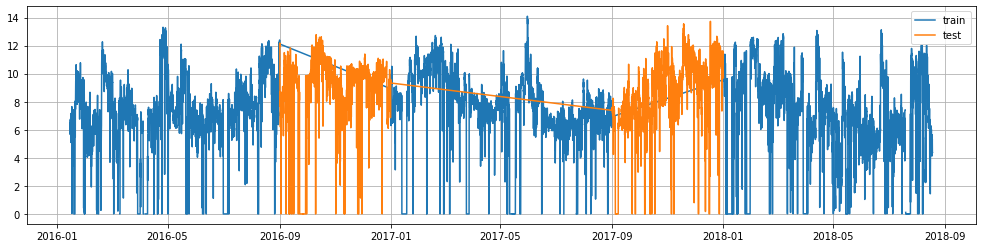

In [9]:
plt.figure(figsize=(17,4))
plt.plot(data_train.index,data_train['rougher.input.feed_au'], label='train')
plt.plot(data_test.index,data_test['rougher.input.feed_au'], label='test')
plt.grid()
plt.legend()
plt.show()

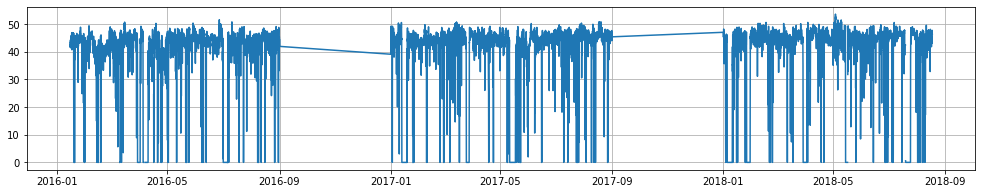

In [10]:
plt.figure(figsize=(17,3))
plt.plot(data_train.index,data_train['final.output.concentrate_au'])
plt.grid()
plt.show()

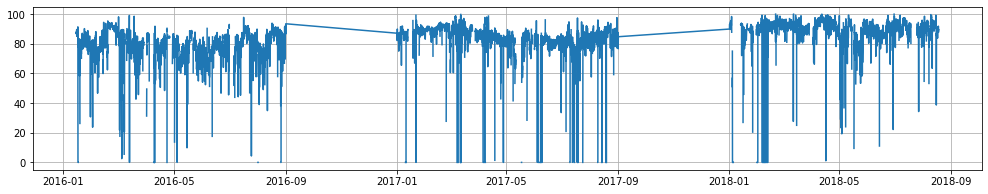

In [11]:
plt.figure(figsize=(17,3))
plt.plot(data_train.index,data_train['rougher.output.recovery'])
plt.grid()
plt.show()

Имеется полный датасет (22716 записей), из которого вырезаны по времени две выборки: обучающая (16860 записей, 3 временных интервала) и тестовая (5856 записей, 2 временных интервала). Столбец с уникальными значениями - date, поэтому его делаем индексом при создании DataFrame. Все столбцы - вещественные. Встречаются пропуски и выбросы в районах минимальных значений.

1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между расчётом и значением признака

In [12]:
def recovery(feed, concetrate, tail):
    '''
    Расчет эффективности обогащения (recovery)
    Входные парамеры:
      feed - доля золота в сырье/концентрате до флотации/очистки (F)
      concetrate - доля золота в концентрате после флотации/очистки (C)
      tail - доля золота в отвальных хвостах после флотации/очистки (T)
    '''
    return concetrate * (feed-tail) / feed / (concetrate-tail) * 100

In [13]:
check_recovery = data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                                    'rougher.output.tail_au', 'rougher.output.recovery']].dropna()
check_recovery['rougher.output.recovery1'] = recovery(check_recovery['rougher.input.feed_au'], 
                          check_recovery['rougher.output.concentrate_au'], 
                          check_recovery['rougher.output.tail_au'])
print('MAE =', mean_absolute_error(check_recovery['rougher.output.recovery'], 
                          check_recovery['rougher.output.recovery1']))

MAE = 1.0512313043960013e-14


Разница расчитанного значения эффективности и соответствующего признака из тестовой выборки приближается к нулю. Это подтверждает, что эффективность рассчитывается правильно.

1.3. Проанализируем признаки, недоступные в тестовой выборке

In [14]:
print('Признаки, отсутствующие в тестовой выборке:')
for col in data_train.columns:
    if not col in data_test.columns:
        print('-', col)

Признаки, отсутствующие в тестовой выборке:
- final.output.concentrate_ag
- final.output.concentrate_pb
- final.output.concentrate_sol
- final.output.concentrate_au
- final.output.recovery
- final.output.tail_ag
- final.output.tail_pb
- final.output.tail_sol
- final.output.tail_au
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol
- primary_cleaner.output.tail_au
- rougher.calculation.sulfate_to_au_concentrate
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.au_pb_ratio
- rougher.output.concentrate_ag
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.concentrate_au
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_pb
- rougher.output.tail_sol
- rou

В тестовой выборке остутствуют парамеры продукта (output) для всех четырех этапов, а также расчетные характеристики (calculation) для этапа флотации. Согласно описанию проекта эти параметры недоступны в процессе обогащения, т.к. замеряются или рассчитываются после его завершения. Таким образом, их нельзя использовать для обучения модели.

1.4. Предобработка данных

In [15]:
print('Строк всего:', len(data_train))
print('Строк без пропусков:', len(data_train.dropna()))

Строк всего: 16860
Строк без пропусков: 11017


Выборки содержат выбросы и пропуски. Если просто удалить строки, содержащие пропуски, то в обучающей выборке останется всего 11 тыс. строк из 16,8 тыс. Это слишком большая потеря, нужно попытаться восстановить данные за исключением целевых признаков ('rougher.output.recovery' и 'final.output.recovery') в обучающей выборке. Можно воспользоваться тем, что согласно описанию проекта соседние по времени парамеры часто похожи (по всей видимости, они медленно меняются). Тогда можно сначала удалить выбросы, а затем заполнить пропуски (как изначальные, так и появившиеся на месте выбросов) на основании соседних значений - методом fillna с параметром method=ffill (заполняет пропущенные значения ближайшими предыдущими). Выбросами будем считать значения за пределами 2,5 СКО, для данной выборки это позволит полностью избавиться от выбросов в районе минимальных значений. Для ускорения удаление выбросов сделаем только для тех столбцов обучающей выборки, которые присутствуют в тестовой выборке. После заполнения пропусков ближайшими все еще могут остаться пропуски в начале выборки, их просто удалим.

In [16]:
# удаление строк с пропусками в целевых параметрах
data_train = data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])

# определение границ интервала k sigma
def interval_ksigma (data, ksigma=1):
    desc = data.describe()
    lim1 = desc['mean'] - ksigma*desc['std']
    lim2 = desc['mean'] + ksigma*desc['std']
    return(lim1, lim2)

# удаление выбросов за пределами двух СКО
for col in data_test.columns:
    lim1, lim2 = interval_ksigma(data_train[col], 2.5)
    data_train[col] = data_train[col].where(data_train[col] > lim1)
    data_train[col] = data_train[col].where(data_train[col] < lim2)
    
# заполнение пропусков ближайшими значениями
data_train = data_train.fillna(method='ffill')
data_train = data_train.dropna()
print('Строк после обработки:', len(data_train))

Строк после обработки: 14141


В результате предобработки обучающей выборки кол-во строк сократилось несильно - с 14,8 тыс. до 14,1. Посмотрим, как изменились данные:

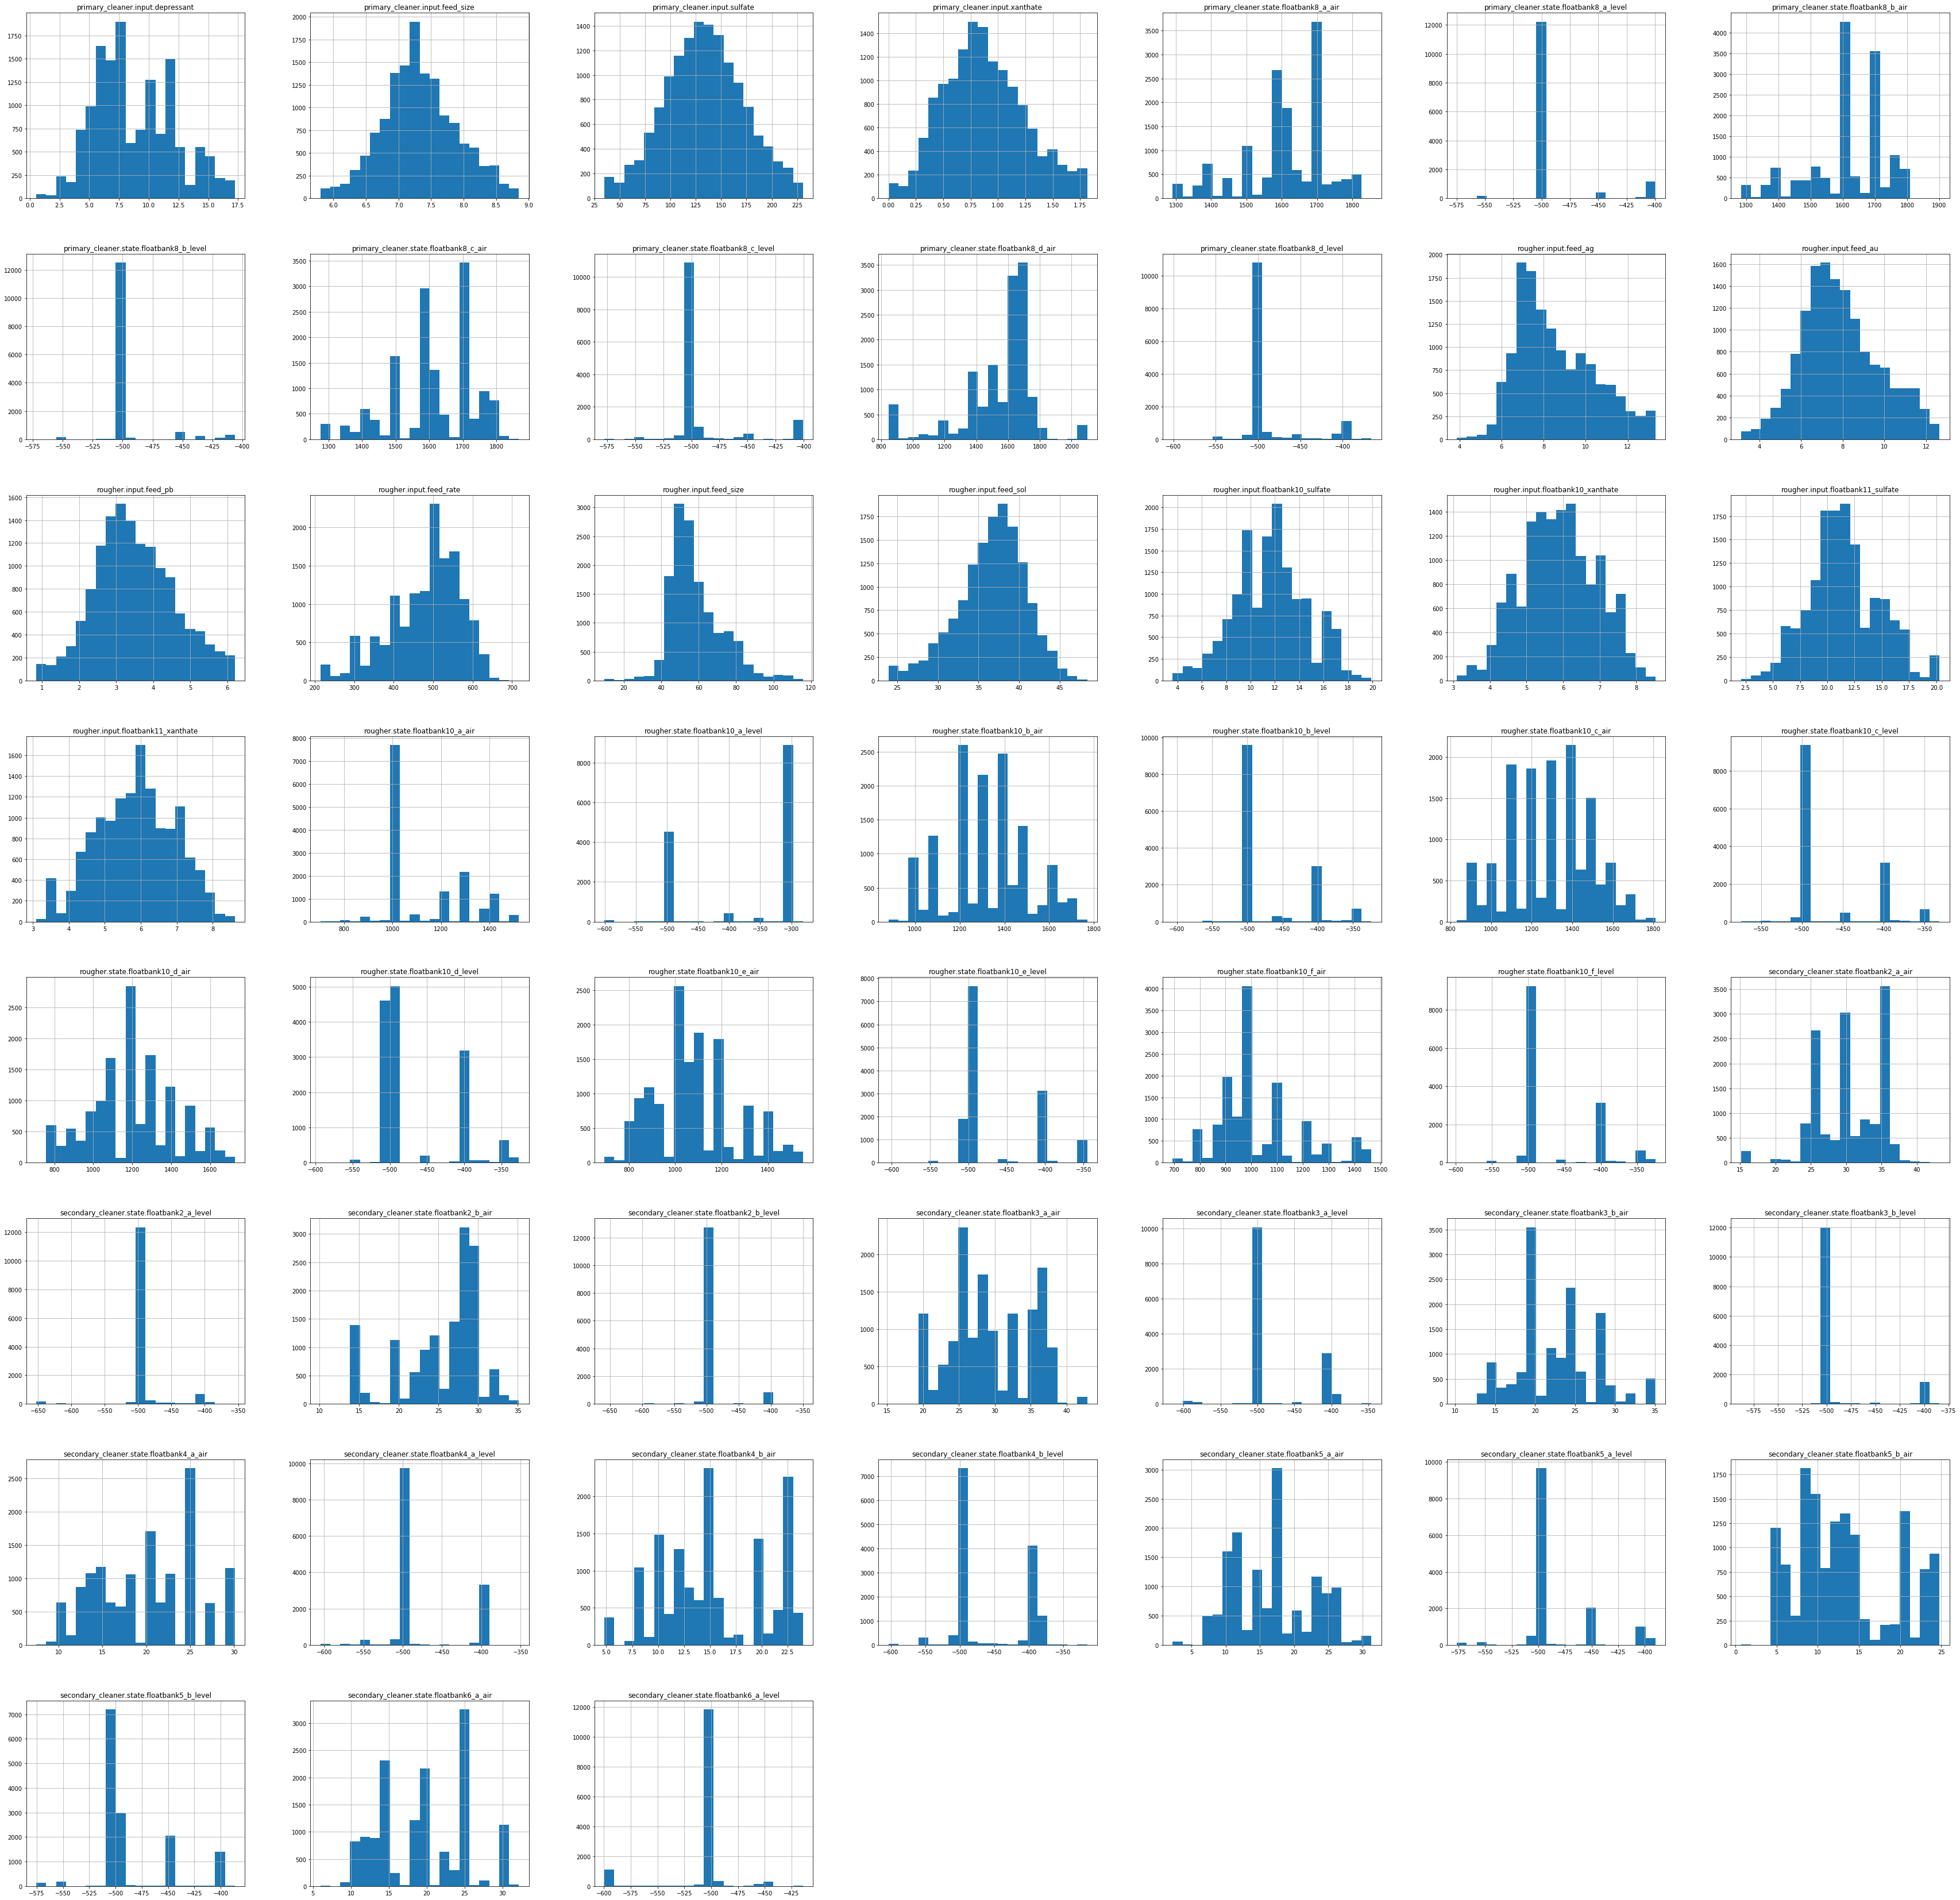

In [17]:
data_train[data_test.columns].hist(figsize=(60,60), bins=20)
plt.show()

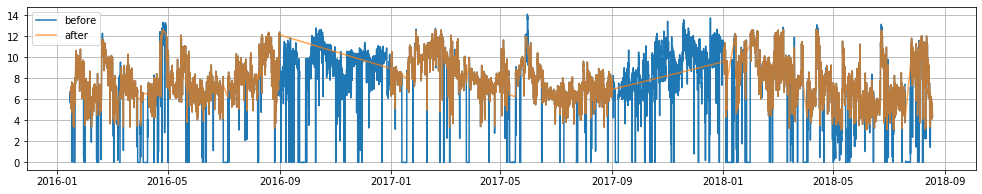

In [18]:
plt.figure(figsize=(17,3))
plt.plot(data_full.index, data_full['rougher.input.feed_au'], label='before')
plt.plot(data_train.index, data_train['rougher.input.feed_au'], label='after', alpha=0.7)
plt.legend()
plt.grid()
plt.show()

Гистограммы стали больше похожи на нормальное распределение, а на графике зависимости от времени видно, как обрезаны выбросы. 

С тестовой выборкой поступим следующим образом:
- возьмем из полного датасета целевые признаки и удалим строки с пропусками в целевых признаках
- удалим выбросы в признаках тестовой выборки, при этом выброс будет определяться по величине 3 СКО для обучающей выборки
- заполним пропуски предыдущими значениями (это допустимо, т.к. можно делать, даже получая данные в режиме реального времени)

В тестовой выборке нет целевых признаков, их надо взять из полной выборки. После этого нужно удалить строки с пропусками в целевых признаках, удалить выбросы, которые а затем заполнить пропуски в остальных столбцах тестовой выборки.

In [19]:
print('Строк изначально:', len(data_test))

target_test = data_full.loc[data_test.index,['rougher.output.recovery','final.output.recovery']]
target_test = target_test.dropna()
data_test = data_test.loc[target_test.index]

# удаление выбросов
for col in data_test.columns:
    lim1, lim2 = interval_ksigma(data_train[col], 3)
    data_test[col] = data_test[col].where(data_test[col] > lim1)
    data_test[col] = data_test[col].where(data_test[col] < lim2)
    
# заполнение пропусков ближайшими значениями
data_test = data_test.fillna(method='ffill')
data_test = data_test.dropna()
print('Строк после обработки:', len(data_test))

Строк изначально: 5856
Строк после обработки: 5290


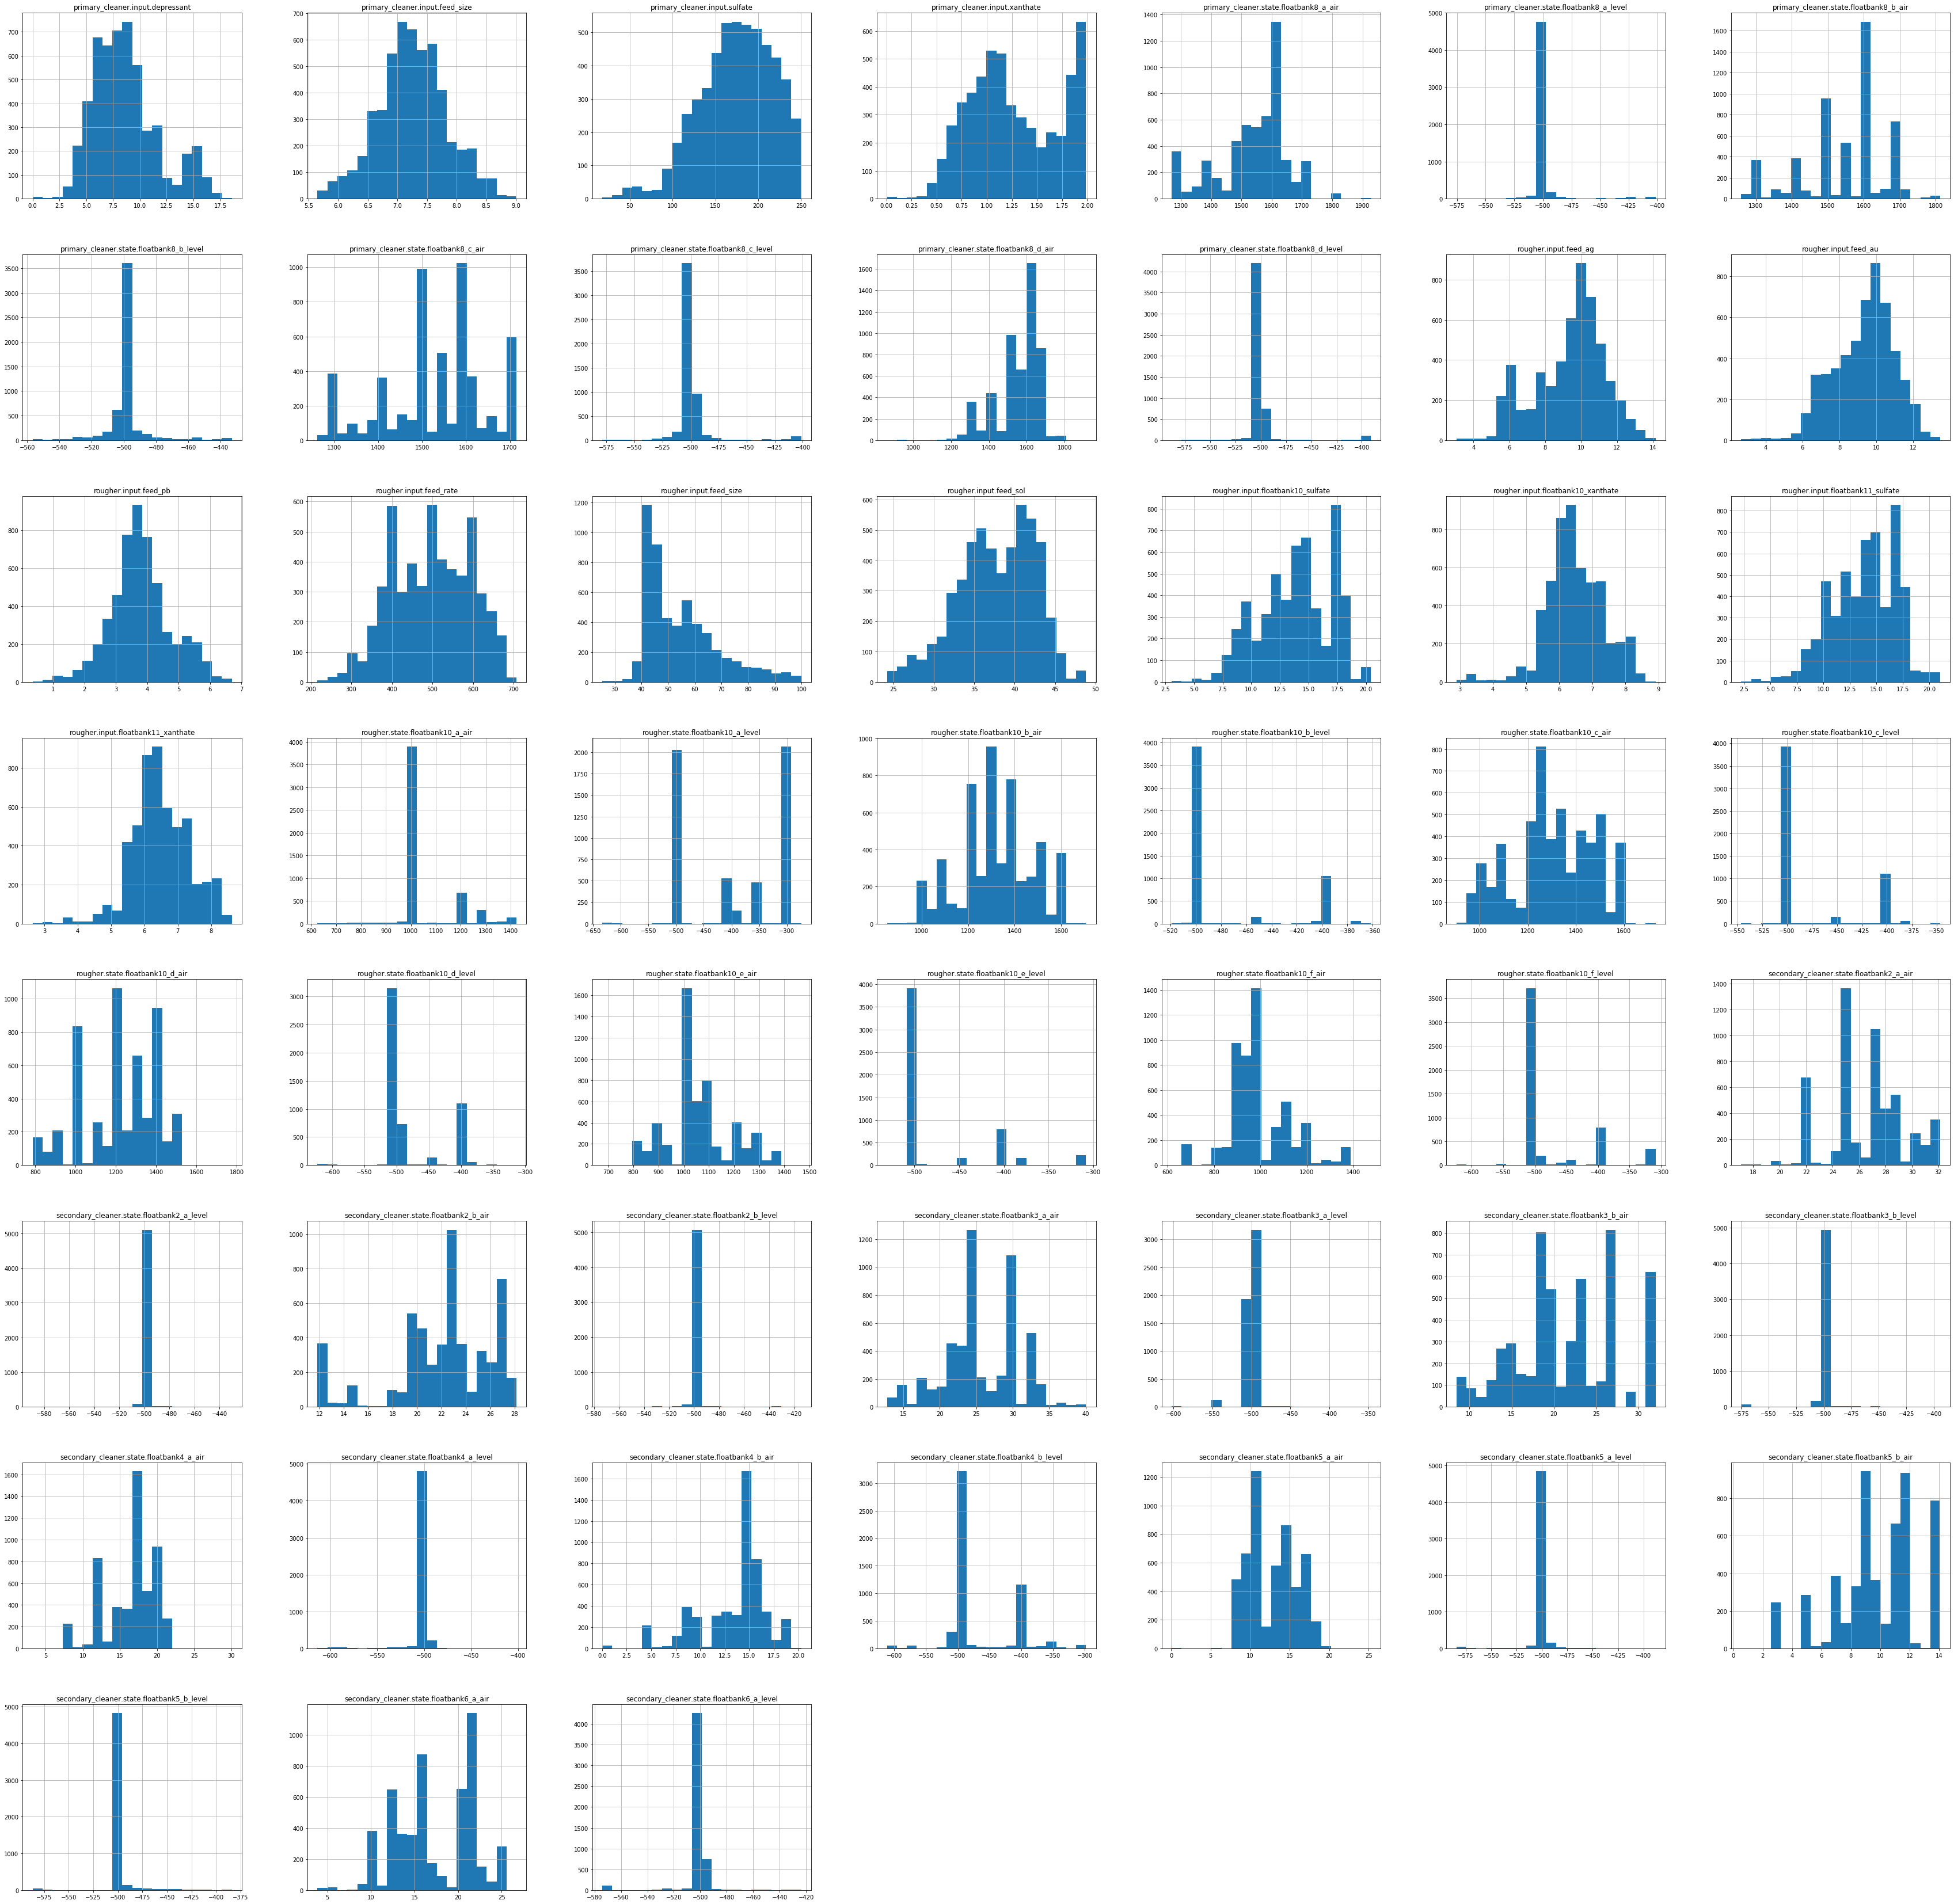

In [20]:
data_test.hist(figsize=(60,60), bins=20)
plt.show()

Из-за отсутствия целевых признаков тестовая выборка уменьшилась с 5,8 до 5,3 тыс. строк.

# 2. Анализ данных

2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [21]:
def plot_concentration(feed, rougher, primary, final, title=''):
    data = pd.DataFrame({'Сырье': feed, 'Флотация':rougher,
                         'Первичная\nочистка': primary, 'Вторичная\nочистка': final})
    data.boxplot()
    plt.ylabel('Концентрация')
    plt.title(title)
    plt.show()

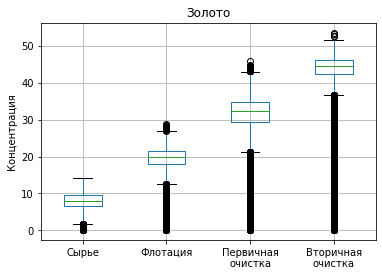

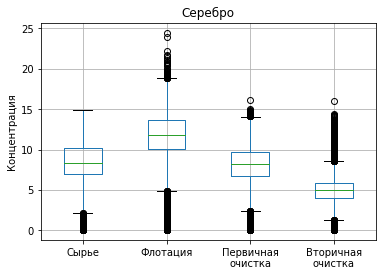

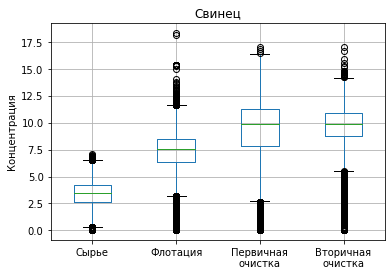

In [22]:
plot_concentration(data_full['rougher.input.feed_au'], 
                   data_full['rougher.output.concentrate_au'], 
                   data_full['primary_cleaner.output.concentrate_au'], 
                   data_full['final.output.concentrate_au'], 'Золото')

plot_concentration(data_full['rougher.input.feed_ag'], 
                   data_full['rougher.output.concentrate_ag'], 
                   data_full['primary_cleaner.output.concentrate_ag'], 
                   data_full['final.output.concentrate_ag'], 'Серебро')

plot_concentration(data_full['rougher.input.feed_pb'], 
                   data_full['rougher.output.concentrate_pb'], 
                   data_full['primary_cleaner.output.concentrate_pb'], 
                   data_full['final.output.concentrate_pb'], 'Свинец')

Концентрация золота стабильно повышается на каждом этапе: с 8 в сырье до 44 после вторичной очистки (здесь и далее приведены медианные значения). Это целевая задача техпроцесса, так что такая динамика ожидаема.  
Концентрация серебра составляет 7,5 в сырье, далее повышается до 12 при флотации, но снижается до 5 в процессе очистки. Можно сделать вывод, что техпроцесс хорошо разделяет золото и серебро в ходе очистки.  
Концентрация свинца повышается на всех этапах очистки, хотя и не так сильно, как золота: с 3 до 10. Это свидетельствует о том, что техпроцесс не может полностью разделить золото и свинец.

2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [23]:
describe1 = data_train['rougher.input.feed_size'].describe()
describe2 = data_test['rougher.input.feed_size'].describe()
pd.DataFrame([describe1, describe2]).transpose()

,rougher.input.feed_size,rougher.input.feed_size
count,14141.000000,5290.000000
mean,58.515260,54.955069
std,13.855519,13.586315
min,9.659576,25.334235
25%,48.857687,43.910024
50%,55.190726,50.822135
75%,65.630359,62.072309
max,115.787033,99.938789


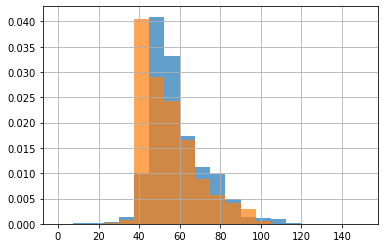

In [24]:
data_train['rougher.input.feed_size'].hist(bins=20, range=(0,150), alpha=0.7, density=True)
data_test['rougher.input.feed_size'].hist(bins=20, range=(0,150), alpha=0.7, density=True)

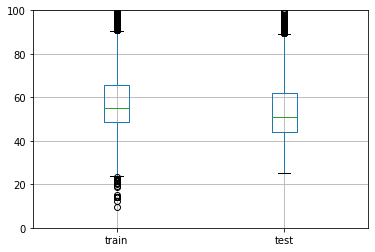

In [25]:
pd.DataFrame({'train': data_train['rougher.input.feed_size'], 
              'test': data_test['rougher.input.feed_size']}).boxplot()
plt.ylim(0,100)
plt.show()

Несмотря на то, что средние размеры гранул в обучающей и тестовой выборках статистически значимо отличаются (гипотеза о равенстве средних отвергнута с использованием bootstrap, здесь код не приводится), распределения в целом похожи: они одинаково скошены вправо, межквартильные расстояния пересекаются.

2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

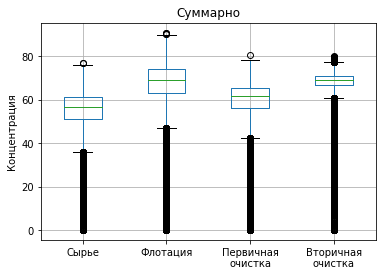

In [26]:
feed_cols = ['rougher.input.feed_au', 'rougher.input.feed_ag',
                'rougher.input.feed_pb', 'rougher.input.feed_sol']
rougher_cols = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
                'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
primary_cols = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']
final_cols = ['final.output.concentrate_au', 'final.output.concentrate_ag',
                'final.output.concentrate_pb', 'final.output.concentrate_sol']

data_full['rougher.input.feed_all'] = data_full[feed_cols].sum(axis=1)
data_full['rougher.output.concentrate_all'] = data_full[rougher_cols].sum(axis=1)
data_full['primary_cleaner.output.concentrate_all'] = data_full[primary_cols].sum(axis=1)
data_full['final.output.concentrate_all'] = data_full[final_cols].sum(axis=1)
plot_concentration(data_full['rougher.input.feed_all'], 
                   data_full['rougher.output.concentrate_all'], 
                   data_full['primary_cleaner.output.concentrate_all'], 
                   data_full['final.output.concentrate_all'], 'Суммарно')

Суммарная концентрация в сырье составляет 58. Она растет при флотации до 68, затем снижается до 61 при первичной очистке и  снова поднимается до 68 при вторичной очистке. Есть совсем немного выбросов в сторону увеличения концентрации и длинные хвосты в сторону уменьшения, вплоть до нуля. В обучающей выборки уже удаляли выбросы, а в тестовой этих данных нет.

# 3. Модель

### 3.1. Введем функцию для вычисления итоговой sMAPE.

In [27]:
def calc_smape(target, prediction):
    if len(target) != len(prediction):
        print('smape_error: target and predict sizes should be equal')
        return np.nan
    up = np.abs(target-prediction)
    down = (np.abs(target) + np.abs(prediction))/2
    res = np.sum(up/down)
    return res/len(target)*100


def calc_rougher_smape(target, prediction):

    # т.к. линейная регрессия и дерево решений возвращают одномерный прогноз по-разному
    if len(prediction.shape)>1:
        prediction = prediction[:,0]
    
    if len(target) != len(prediction):
        print('smape_score error: target and predict sizes should be equal')
        return np.nan
    #return calc_smape(target['rougher.output.recovery'], prediction[:,0])
    return calc_smape(target['rougher.output.recovery'], prediction)


def calc_final_smape(target, prediction):
    
    # т.к. линейная регрессия и дерево решений возвращают одномерный прогноз по-разному
    if len(prediction.shape)>1:
        if prediction.shape[1] == 1:
            prediction = prediction[:,0]
        else:
            prediction = prediction[:,1]

    if len(target) != len(prediction):
        print('smape_score error: target and predict sizes should be equal')
        return np.nan
    # return calc_smape(target['final.output.recovery'], prediction[:,1])
    return calc_smape(target['final.output.recovery'], prediction)


def rougher_plus_final(rougher, final):
    return rougher*0.25 + final*0.75


def calc_total_smape(target, prediction):
    if len(target) != len(prediction):
        print('total_smape_error: target and predict sizes should be equal')
        return np.nan
    smaper = calc_smape(target['rougher.output.recovery'], prediction[:,0])
    smapef = calc_smape(target['final.output.recovery'], prediction[:,1])
    return rougher_plus_final(smaper, smapef)

In [28]:
smape = make_scorer(calc_smape, greater_is_better=False)
rougher_smape = make_scorer(calc_rougher_smape, greater_is_better=False)
final_smape = make_scorer(calc_final_smape, greater_is_better=False)
total_smape = make_scorer(calc_total_smape, greater_is_better=False)
mae = make_scorer(mean_absolute_error, greater_is_better=False)

### 3.2. Обучим разные модели и оценим их качество кросс-валидацией

#### 3.2.1 Совместное определение целевых параметров

Подготовим обучающую и тестовую выборки

In [29]:
target_train = data_train[['rougher.output.recovery','final.output.recovery']]
features_train = data_train[data_test.columns]
features_test = data_test
print('train:', target_train.shape, features_train.shape)
print('test:', target_test.shape, features_test.shape)

# стандартизация признаков
columns = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train), columns=columns, index=features_train.index)
features_test = pd.DataFrame(scaler.transform(features_test), columns=columns, index=features_test.index)
features_train.head()

train: (14141, 2) (14141, 52)
test: (5290, 2) (5290, 52)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 08:00:00,-0.045328,1.091512,-0.140828,0.019385,-0.087693,-0.311219,-0.118487,-0.235908,-0.098697,-0.329104,0.244630,-0.396445,-1.456928,-1.045685,0.887278,-0.134635,-0.206523,-0.732730,0.508150,0.899774,0.517816,0.865305,-0.751724,-0.326001,1.541494,0.341142,1.479093,0.358748,1.841954,0.322934,1.813227,0.335403,2.344470,0.313355,-0.945578,-0.141430,-0.291709,-0.193629,-0.949821,-0.514670,0.260569,-0.363524,-1.073362,-0.588824,-0.652958,-0.779105,-1.168780,-0.489794,-0.899413,-0.457374,-0.987019,-3.135985
2016-01-15 09:00:00,0.117666,1.091005,-0.140828,0.055189,-0.072244,-0.321869,-0.129919,-0.263814,-0.106590,-0.330985,0.232959,-0.354181,-1.440425,-0.999658,1.032598,-0.000433,0.083534,-0.675617,0.693450,0.921042,0.714559,0.856581,-0.748357,-0.314394,1.536866,0.326239,1.479257,0.340622,1.917366,0.311932,1.797195,0.301639,2.337460,0.315351,-0.916993,-0.113017,-0.300323,-0.169424,-0.950653,-0.507778,0.248624,-0.368575,-1.068814,-0.565661,-0.654577,-0.774536,-1.181127,-0.542165,-0.882481,-0.469365,-0.984485,-3.102322
2016-01-15 10:00:00,0.324213,1.091111,-0.140828,0.051546,-0.092968,-0.320729,-0.109990,-0.279941,-0.119869,-0.290489,0.232714,-0.385017,-1.404936,-0.907750,0.960167,0.129448,0.467672,-0.614047,0.792099,0.901355,0.779054,0.865099,-0.749895,-0.327928,1.538415,0.351811,1.478434,0.362378,1.817045,0.320820,1.809361,0.318797,2.341140,0.314245,-0.933050,-0.120710,-0.294963,-0.192923,-0.940627,-0.515430,0.258469,-0.361209,-1.065384,-0.587035,-0.665300,-0.780863,-1.167175,-0.413097,-0.878420,-0.458307,-0.980433,-3.102322
2016-01-15 11:00:00,0.305781,1.093577,-0.140828,0.090091,-0.094818,-0.318119,-0.098469,-0.260959,-0.143383,-0.350256,0.231832,-0.347858,-1.487734,-1.049124,1.172553,0.140374,0.430923,-0.722747,0.809191,0.838813,0.739154,0.810361,-0.748508,-0.325686,1.541766,0.368904,1.481620,0.375834,1.852214,0.335490,1.792437,0.276242,2.338871,0.315621,-0.913670,-0.145871,-0.286101,-0.194403,-0.958534,-0.496384,0.260666,-0.361093,-1.061696,-0.581996,-0.660276,-0.780292,-1.171161,-0.457464,-0.885117,-0.444576,-0.980741,-3.

Проверим, какое значение метрики sMAPE будет получено при прогнозировании среднего значения для тестовой выборки (константная модель).

In [30]:
rougher_rec_mean = [target_train['rougher.output.recovery'].mean()]*len(target_train)
final_rec_mean = [target_train['final.output.recovery'].mean()]*len(target_train)
smaper_treshold = calc_smape(target_train['rougher.output.recovery'], rougher_rec_mean).round(2)
smapef_treshold = calc_smape(target_train['final.output.recovery'], final_rec_mean).round(2)
smape_treshold = rougher_plus_final(smaper_treshold, smapef_treshold).round(2)
print('sMAPE rougher =', smaper_treshold)
print('sMAPE final =', smapef_treshold)
print('sMAPE total =', smape_treshold)

sMAPE rougher = 11.83
sMAPE final = 11.12
sMAPE total = 11.3


Константная модель дает значение мерики sMAPE 11,3%. В дальнейшем будем считать модели адеквартными, если они дают значение sMAPE ниже 11,3%.

Подготовим таблицу для сравнения результатов разных моделей и функции для сохранения и вывода на графики результатов

In [31]:
model_res = pd.DataFrame()
scoring = {'smape': total_smape, 'smape_r': rougher_smape, 'smape_f': final_smape}
scoring_r = {'smape_r': rougher_smape}
scoring_f = {'smape_f': final_smape}

In [32]:
def cv_var0(model, features, target, scoring, model_name=''):
    scoring_labels = list(scoring.keys())
    model.fit(features_train, target_train)
    results = cross_validate(model, features, target, cv=5, scoring=scoring)
    for i in scoring_labels:
        res = -results['test_'+i].mean().round(2)
        if model_name:
            model_res.loc[model_name, i] = res
        print(i, res)

In [33]:
def compare_hyperparams(x, results, labels='', title='', xlabel='', treshold=0):
    '''
    функция выводит графики зависимости выбранных метрик исследуемой модели от значения гиперпараметра
    х - значения гиперпараметра
    results - массив результатов
    label - название результата (легенда линии)
    title - название модели (подпись графика)
    xlabel - название изменяемого гиперпараметра (подпись оси Х)
    '''
    fig, ax = plt.subplots(figsize=(10,4))
    if treshold:
        ax.plot([min(x),max(x)],[treshold,treshold], '--r', linewidth=1)
    for i in range(len(results)):
        ax.plot(x, results[i], marker='.', label=labels[i])
    ax.grid()
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    # plt.ylim(0,30)
    plt.show()
    

def cv_var1(model, parameters, features, target, scoring, model_name=''):
    scoring_labels = list(scoring.keys())
    grid = GridSearchCV(model, parameters, scoring=scoring, refit=scoring_labels[0], n_jobs=-1, cv=5)
    grid.fit(features, target)
    
    results = []
    for i in scoring_labels:
        res = -grid.cv_results_['mean_test_'+i].round(2)
        results.append(res)
        if model_name:
            model_res.loc[model_name, i] = res.min()

    compare_hyperparams(list(parameters.values())[0], results, scoring_labels, xlabel=list(parameters.keys())[0], 
                        title=model_name, treshold=smape_treshold)
    
    print(grid.best_params_)
    for i in range(len(results)):
        print(scoring_labels[i], min(results[i]))

In [34]:
def compare_hyperparams_heatmap(x1, x2, y, title='', label=['','']):
    '''
    функция выводит график типа "heatmap" зависимости качества исследуемой модели от значений двух гиперпараметров
    х1 - значения гиперпараметра 1
    х2 - значения гиперпараметра 2
    y - значение метрики в виде одномерного массива (результат работы функции GridSearchCV.cv_results_['...'])
    title - название модели (подпись графика)
    label - массив с названиями двух гиперпараметров (подписи осей Х и Y)
    '''
    y = y.reshape(len(x1), len(x2))

    ysize = len(x1) if len(x1)<16 else 16
    xsize = len(x2) if len(x2)<16 else 16
    fig, ax = plt.subplots(figsize=(xsize,ysize))
    im = ax.imshow(y, cmap='coolwarm')
    plt.title(title)
    
    cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)

    ax.set_xticks(np.arange(len(x2)))
    ax.set_yticks(np.arange(-0.5,len(x1)+0.5))
    ax.set_xticklabels(x2)
    ax.set_yticklabels(x1)
    ax.set_xlabel(label[1])
    ax.set_ylabel(label[0])

    for i in range(len(x1)):
        for j in range(len(x2)):
            text = ax.text(j, i, y[i, j], ha="center", va="center", color="k", fontsize=8)
    plt.show()

    
def cv_var2(model, parameters, features, target, scoring, model_name=''):
    scoring_labels = list(scoring.keys())
    parameter_values = list(parameters.values())
    parameter_keys = list(parameters.keys())
    
    grid = GridSearchCV(model, parameters, scoring=scoring, refit=scoring_labels[0], n_jobs=-1, cv=5)
    grid.fit(features, target)

    results = []
    for i in scoring_labels:
        res = -grid.cv_results_['mean_test_'+i].round(2)
        results.append(res)
        if model_name:
            model_res.loc[model_name, i] = res.min()
        title = model_name + ' (' + i + ')'
        compare_hyperparams_heatmap(parameter_values[0], parameter_values[1], res, label=parameter_keys, title=title)

    print(grid.best_params_)
    for i in range(len(results)):
        print(scoring_labels[i], min(results[i]))

#### Линейная регрессия

In [35]:
cv_var0(LinearRegression(), features_train, target_train, scoring, 'Linear Regression')

smape 12.15
smape_r 13.1
smape_f 11.83


Линейная регрессия дает результат хуже, чем константная модель.

#### Дерево решений

Дервья позволяют определять кол-во признаков, принимаемых в расчет (параметр max_features), что может быть актуально для нашей выборки, в которой 52 признака. Сравним результаты модели "дерево решений" с настройками по умолчанию и с ограничением числа признаков.

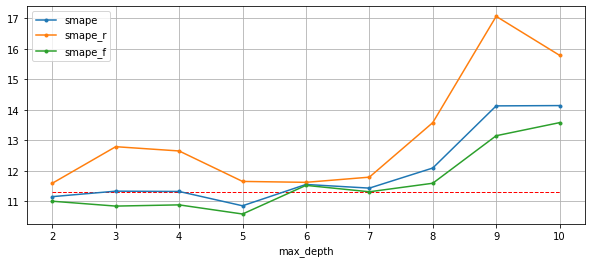

{'max_depth': 5}
smape 10.85
smape_r 11.59
smape_f 10.58


In [36]:
cv_var1(DecisionTreeRegressor(random_state=123), {'max_depth': range(2,11)}, features_train, target_train, scoring)

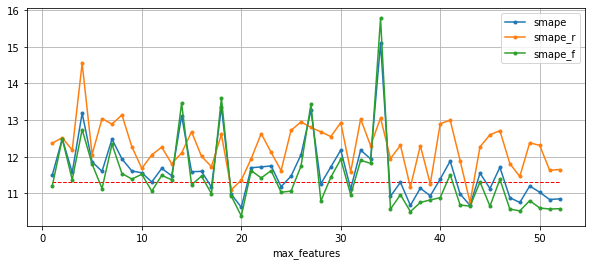

{'max_features': 20}
smape 10.62
smape_r 10.75
smape_f 10.38


In [37]:
parameters = {'max_features': range(1,features_train.shape[1]+1)}
cv_var1(DecisionTreeRegressor(random_state=123, max_depth=5), parameters, features_train, target_train, scoring)

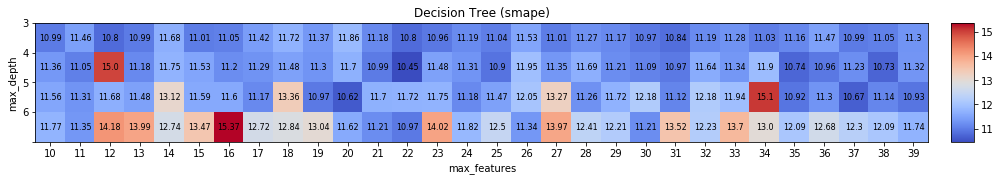

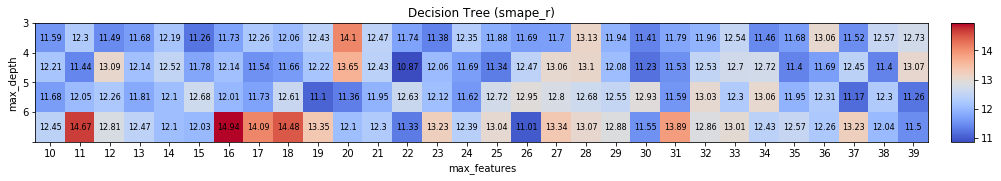

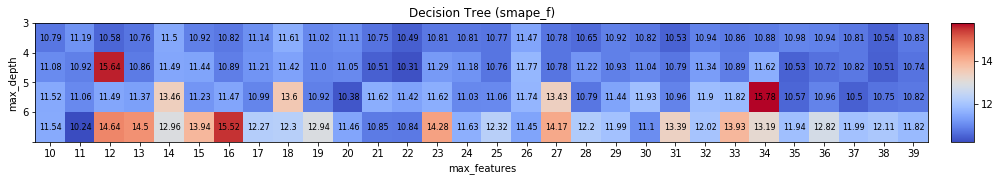

{'max_depth': 4, 'max_features': 22}
smape 10.45
smape_r 10.87
smape_f 10.24


In [38]:
parameters = {'max_depth': range(3,7), 'max_features': range(10,40)}
cv_var2(DecisionTreeRegressor(random_state=123), parameters, features_train, target_train, scoring, 'Decision Tree')

Дерево решений без ограничения числа признаков дает лучший результат 10,85 при глубине дерева 5, что несколько лучше, чем у константной модели. При ручном ограничении числа признаков качество модели сильно меняется. При этом четкую зависимость отследить сложно: на графике много чередующихся пиков и провалов. Одновременный перебор двух параметров с помощью GridSearchCV позволяет получить результат sMAPE 10,45 при 22 признаках и глубине дерева 4.

#### Случайный лес

Для экономии времени вначале исследуем зависимость качества модели от значения параметров max_depth и max_features для небольшого количества деревьев. Потом посмотрим на лучший вариант при разном количестве деревьев.

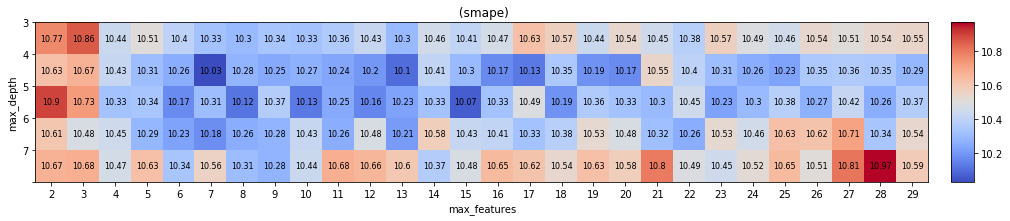

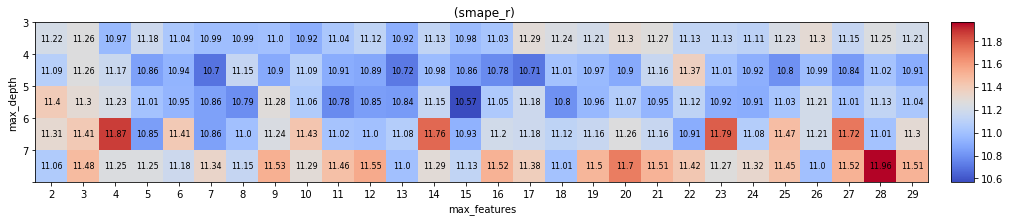

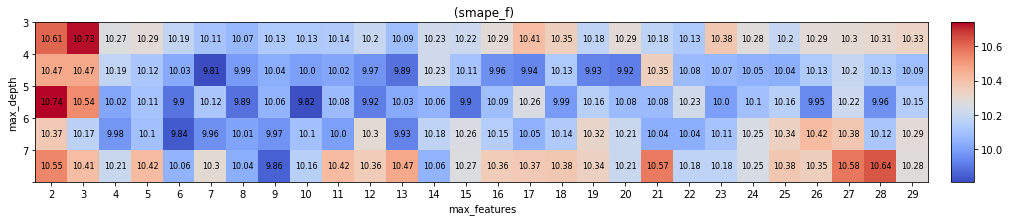

{'max_depth': 4, 'max_features': 7}
smape 10.03
smape_r 10.57
smape_f 9.81
Wall time: 3min 1s


In [44]:
%%time
parameters = {'max_depth': range(3,8), 'max_features': range(2,30)}
cv_var2(RandomForestRegressor(random_state=123, n_estimators=20), parameters, features_train, target_train, scoring)

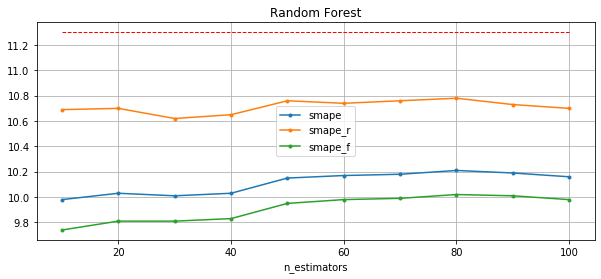

{'n_estimators': 10}
smape 9.98
smape_r 10.62
smape_f 9.74


In [45]:
parameters = {'n_estimators': range(10,101,10)}
cv_var1(RandomForestRegressor(random_state=123, max_depth=4, max_features=7), 
        parameters, features_train, target_train, scoring, 'Random Forest')

Случайный лес позволил снизить sMAPE до 9,98 при глубине дерева 4, кол-ве параметров 7 и 10 деревьях. Как ни странно, в данном случае увеличение кол-ва деревьев не приводит к повышению качества модели.

#### 3.2.2 Раздельное прогнозирование целевых параметров
Так как финальная ошибка (final sMAPE) учитывается в итоговой формуле с большим весом, чем ошибка на этапе флотации (rougher sMAPE), то общая модель заточена на минимизирование финальной ошибки. При этом, если построить отдельные модели для каждого целевого парамера, можно повысить качество прогноза для этапа флотации.

#### Линейная регрессия

In [46]:
cv_var0(LinearRegression(), features_train, target_train, scoring_r, 'Linear Regression - separate')
cv_var0(LinearRegression(), features_train, target_train, scoring_f, 'Linear Regression - separate')

smape_r 13.1
smape_f 11.83


Линейная регрессия показала результат еще хуже, чем был для совмещенной модели.

#### Дерево решений

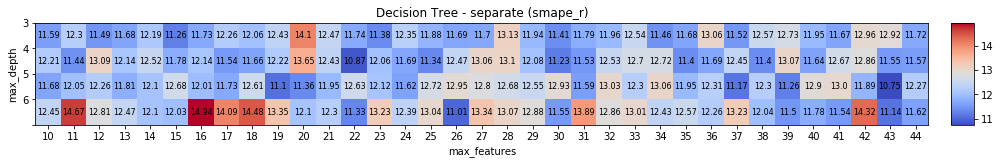

{'max_depth': 5, 'max_features': 43}
smape_r 10.75


In [47]:
parameters = {'max_depth': range(3,7), 'max_features': range(10,45)}
cv_var2(DecisionTreeRegressor(random_state=123), parameters, features_train, target_train, scoring_r, 'Decision Tree - separate')

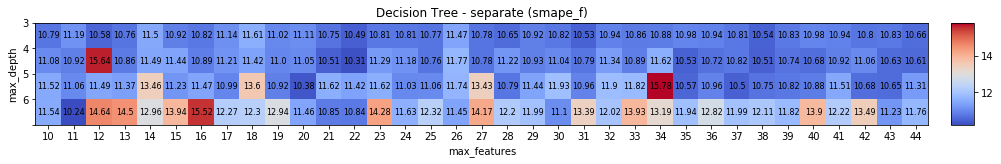

{'max_depth': 6, 'max_features': 11}
smape_f 10.24


In [48]:
parameters = {'max_depth': range(3,7), 'max_features': range(10,45)}
cv_var2(DecisionTreeRegressor(random_state=123), parameters, features_train, target_train, scoring_f, 'Decision Tree - separate')

Дерево решений удалось немного улучшить за счет более тонкой настройки модели для этапа флотации.

#### Случайный лес

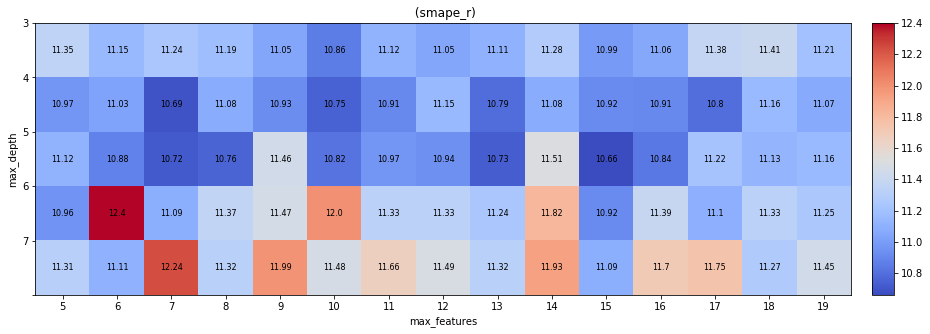

{'max_depth': 5, 'max_features': 15}
smape_r 10.66
Wall time: 39.4 s


In [49]:
%%time
parameters = {'max_depth': range(3,8), 'max_features': range(5,20)}
cv_var2(RandomForestRegressor(random_state=123, n_estimators=10), parameters, features_train, target_train, scoring_r)

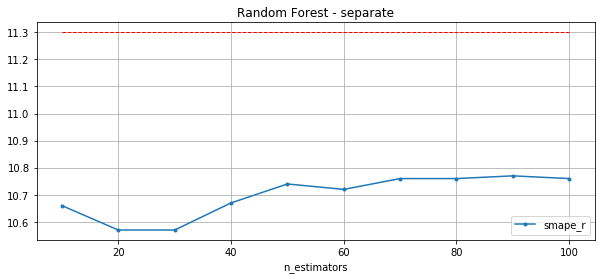

{'n_estimators': 30}
smape_r 10.57


In [50]:
parameters = {'n_estimators': range(10,101,10)}
cv_var1(RandomForestRegressor(random_state=123, max_depth=5, max_features=15), 
        parameters, features_train, target_train, scoring_r, 'Random Forest - separate')

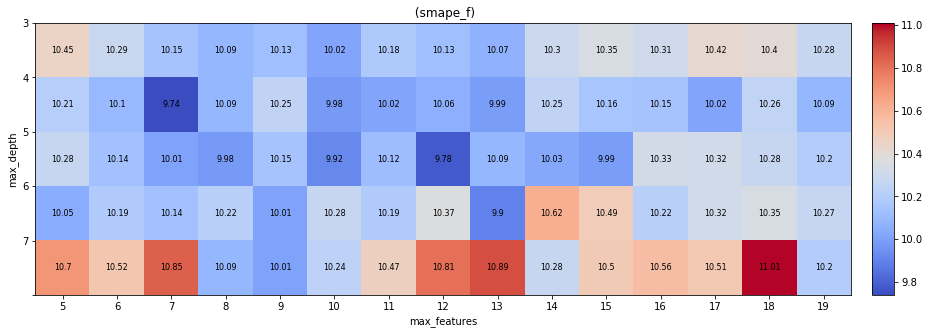

{'max_depth': 4, 'max_features': 7}
smape_f 9.74
Wall time: 38.7 s


In [51]:
%%time
parameters = {'max_depth': range(3,8), 'max_features': range(5,20)}
cv_var2(RandomForestRegressor(random_state=123, n_estimators=10), parameters, features_train, target_train, scoring_f)

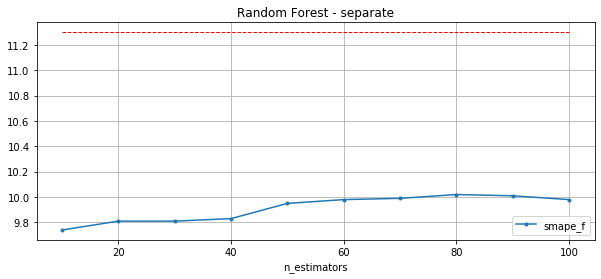

{'n_estimators': 10}
smape_f 9.74


In [52]:
parameters = {'n_estimators': range(10,101,10)}
cv_var1(RandomForestRegressor(random_state=123, max_depth=4, max_features=7), 
        parameters, features_train, target_train, scoring_f, 'Random Forest - separate')

Случайный лес также удалось чуть-чуть улучшить

#### 3.2.3 Прогнозирование целевых параметров с разделением признаков
Попробуем построить отдельные модели для каждого целевого парамера, основываясь на понимании техпроцесса. Для прогнозирования эффективности флотации будем использовать только признаки, относящиеся к этапу флотации. Остальные признаки будем использовать для прогнозирования финальной эффективности.

In [53]:
columns_rougher = []
columns_final = []
for col in features_train.columns:
    if 'rougher' in col:
        columns_rougher.append(col)
    else:
        columns_final.append(col)

In [54]:
def feature_target_prepare (features_col, target_col):
    features_train = data_train[features_col]
    features_test = data_test[features_col]
    target_train = data_train[target_col]
    target_test_new = target_test[target_col]

    # стандартизация признаков
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = pd.DataFrame(scaler.transform(features_train), columns=features_col, index=features_train.index)
    features_test = pd.DataFrame(scaler.transform(features_test), columns=features_col, index=features_test.index)
    
    print(features_train.shape, target_train.shape)
    print(features_test.shape, target_test_new.shape)
    
    return (features_train, target_train, features_test, target_test_new)

In [55]:
features_train_r, target_train_r, features_test_r, target_test_r = feature_target_prepare(columns_rougher, 
                                                                                          ['rougher.output.recovery'])
features_train_f, target_train_f, features_test_f, target_test_f = feature_target_prepare(columns_final, 
                                                                                          ['final.output.recovery'])

(14141, 22) (14141, 1)
(5290, 22) (5290, 1)
(14141, 30) (14141, 1)
(5290, 30) (5290, 1)


In [56]:
cv_var0(LinearRegression(), features_train_r, target_train_r, scoring_r, 'Linear Regression - separate2')
cv_var0(LinearRegression(), features_train_f, target_train_f, scoring_f, 'Linear Regression - separate2')

smape_r 13.07
smape_f 10.73


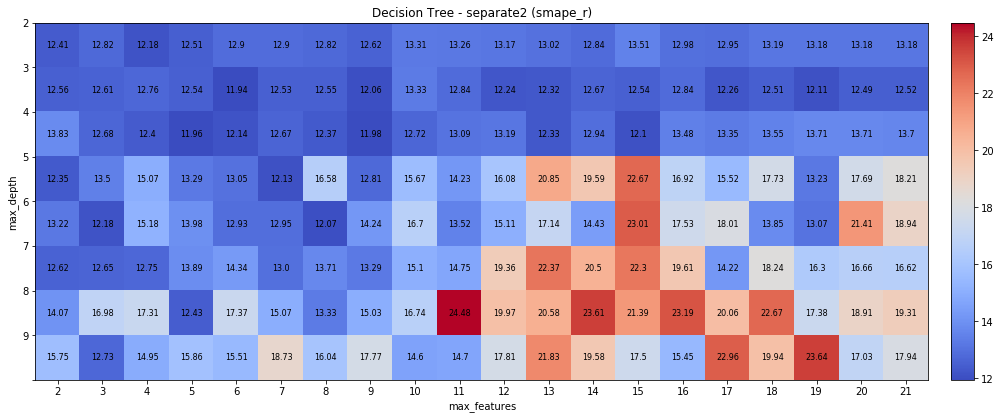

{'max_depth': 3, 'max_features': 6}
smape_r 11.94


In [57]:
parameters = {'max_depth': range(2,10), 'max_features': range(2,features_train_r.shape[1])}
cv_var2(DecisionTreeRegressor(random_state=123), parameters, features_train_r, target_train_r, 
        scoring_r, 'Decision Tree - separate2')

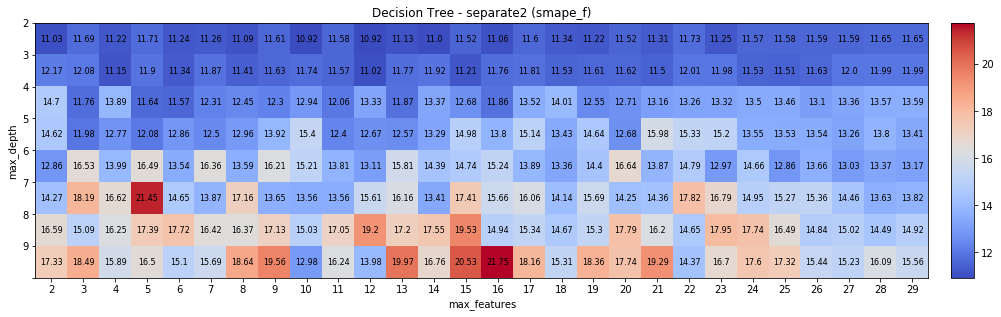

{'max_depth': 2, 'max_features': 12}
smape_f 10.92


In [58]:
parameters = {'max_depth': range(2,10), 'max_features': range(2,features_train_f.shape[1])}
cv_var2(DecisionTreeRegressor(random_state=123), parameters, features_train_f, target_train_f, 
        scoring_f, 'Decision Tree - separate2')

И линейная регрессия, и дерево решений показывают результат хуже, чем раньше. Следовательно, этот подход не применим к данной задаче.

Еще раз взглянем на таблицу с результатами для разных моделей

In [59]:
model_res

,smape,smape_r,smape_f
Linear Regression,12.15,13.10,11.83
Decision Tree,10.45,10.87,10.24
Random Forest,9.98,10.62,9.74
Linear Regression - separate,NaN,13.10,11.83
Decision Tree - separate,NaN,10.75,10.24
Random Forest - separate,NaN,10.57,9.74
Linear Regression - separate2,NaN,13.07,10.73
Decision Tree - separate2,NaN,11.94,10.92


Лучший результат был получен для двух отдельных моделей типа "случайный лес". Необходимо отметить, что одна общая модель показывает практически такой же результат и при этом выигрывает по простоте. Можно сделать вывод, что использование двух отдельных моделей не имеет смысла. Остановимся на модели "случайный лес" с глубиной дерева 4, кол-ве параметров 7 и 10 деревьями.

#### 3.2.4 Тестирование модели

In [60]:
model = RandomForestRegressor(random_state=123, max_depth=4, max_features=7, n_estimators=10)
model.fit(features_train, target_train)
prediction_test = model.predict(features_test)

res_rougher = calc_rougher_smape(target_test, prediction_test)
res_final = calc_final_smape(target_test, prediction_test)
res_total = calc_total_smape(target_test, prediction_test)

print('sMAPE флотации: ', round(res_rougher,2))
print('sMAPE финальная:', round(res_final,2))
print('sMAPE общая:    ', round(res_total,2))

sMAPE флотации:  9.14
sMAPE финальная: 9.16
sMAPE общая:     9.15


sMAPE для тестовой выборки составила 9,15, что даже лучше, чем было получено в ходе кросс-валидации.

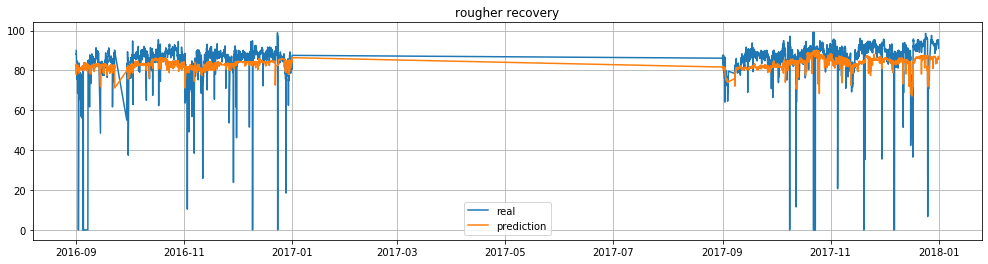

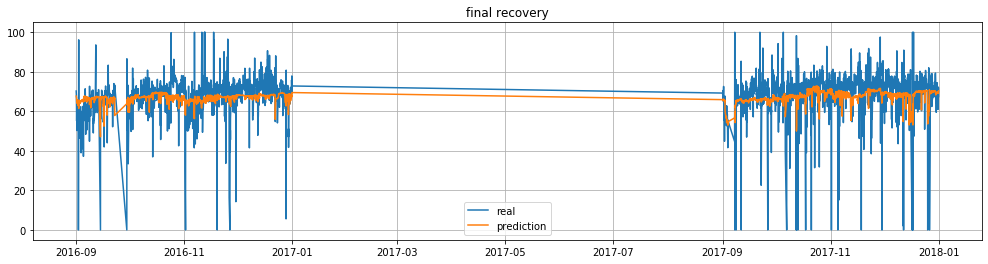

In [69]:
prediction_frame = pd.DataFrame(prediction_test, index=target_test.index, columns=target_test.columns)

plt.figure(figsize=(17,4))
plt.plot(target_test.index, target_test['rougher.output.recovery'], label='real')
plt.plot(prediction_frame.index, prediction_frame['rougher.output.recovery'], label='prediction')
plt.grid()
plt.title('rougher recovery')
plt.legend()
plt.show()

plt.figure(figsize=(17,4))
plt.plot(target_test.index, target_test['final.output.recovery'], label='real')
plt.plot(prediction_frame.index, prediction_frame['final.output.recovery'], label='prediction')
plt.grid()
plt.title('final recovery')
plt.legend()
plt.show()

Графики показывают, что модель тяготеет к предсказанию усредненных значения.

# Выводы

В ходе предобработки из данных были удалены выбросы, а пропуски заполнены ближайшими значениями.

Анализ данных подтвердил адекватность данных техпроцессу и допустимость использования имеющихся обучающей и тестовой выборок.

В ходе построения модели были исследованы модели типа "линейная регрессия", "дерево решений" и "случайный лес". Качество моделей проверялось метрикой sMAPE. Адекватность моделей проверялась сравнением с константной моделью (среднее значение целевых признаков), которая дает значение мерики sMAPE 11,3. По результатам кросс-валидации была выбрана модель "случайный лес" с глубиной дерева 4, кол-вом параметров 7 и 10 деревьями. Применение этой модели на тестовой выборке дало значение мерики sMAPE 9,15.

В ходе работы было замечено несколько нестыковок:
- вопреки приведенной в описании проекта формуле финальная эффективность рассчитывается с использованием концентрации золота до флотации, таким образом появляется корреляция между эффективностью на этапе флотации и финальной эффективностью
- при ограничении использования признаков, не относящихся к этапу, эффективность которого прогнозируется, точность модели снижается, что противоречит техпроцессу 

В дальнейшем рекомендуется подробнее ознакомится с техпроцессом и решить перечисленные выше вопросы.